In [1]:
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import sklearn as sk

%matplotlib inline

In [2]:
df = pd.read_csv("Dry_Bean_Dataset.csv")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
df['Class'] = df['Class'].astype('category')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area             13611 non-null  int64   
 1   Perimeter        13611 non-null  float64 
 2   MajorAxisLength  13611 non-null  float64 
 3   MinorAxisLength  13611 non-null  float64 
 4   AspectRation     13611 non-null  float64 
 5   Eccentricity     13611 non-null  float64 
 6   ConvexArea       13611 non-null  int64   
 7   EquivDiameter    13611 non-null  float64 
 8   Extent           13611 non-null  float64 
 9   Solidity         13611 non-null  float64 
 10  roundness        13611 non-null  float64 
 11  Compactness      13611 non-null  float64 
 12  ShapeFactor1     13611 non-null  float64 
 13  ShapeFactor2     13611 non-null  float64 
 14  ShapeFactor3     13611 non-null  float64 
 15  ShapeFactor4     13611 non-null  float64 
 16  Class            13611 non-null  categor

In [5]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [6]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


<AxesSubplot:xlabel='Class', ylabel='Count'>

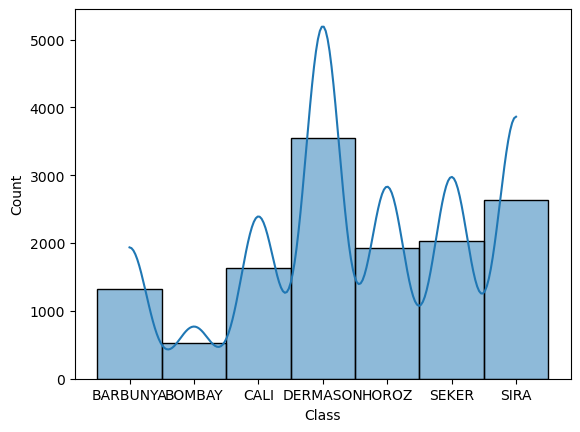

In [7]:
sns.histplot(df['Class'], kde=True, bins=10)

In [8]:
x = df.iloc[:,:16].values
y = df.iloc[:,16].values

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

<AxesSubplot:ylabel='count'>

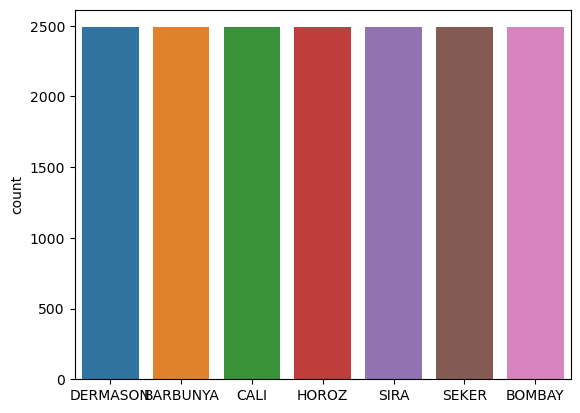

In [10]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE(random_state = 0)
x_train_smote, y_train_smote = resampler.fit_resample(x_train, y_train)

sns.countplot(x=y_train_smote)

In [11]:
y_train_smote

array(['DERMASON', 'DERMASON', 'BARBUNYA', ..., 'SIRA', 'SIRA', 'SIRA'],
      dtype=object)

In [12]:
x_train

array([[2.74900000e+04, 6.18868000e+02, 2.33001523e+02, ...,
        2.17319400e-03, 6.44714352e-01, 9.93497887e-01],
       [3.79460000e+04, 7.38476000e+02, 2.64960115e+02, ...,
        2.03997300e-03, 6.88200708e-01, 9.98671742e-01],
       [6.76860000e+04, 1.04447000e+03, 3.68601069e+02, ...,
        1.35154100e-03, 6.34301572e-01, 9.98299483e-01],
       ...,
       [5.11310000e+04, 8.42796000e+02, 3.16185621e+02, ...,
        1.61755100e-03, 6.51193677e-01, 9.94537407e-01],
       [2.78840000e+04, 6.30303000e+02, 2.39405409e+02, ...,
        2.03213800e-03, 6.19437191e-01, 9.98732343e-01],
       [7.03440000e+04, 1.03798500e+03, 3.78651095e+02, ...,
        1.29571500e-03, 6.24681645e-01, 9.94227288e-01]])

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train_smote)
x_train_s = sc.transform(x_train_smote)
x_test_s= sc.transform(x_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5,metric='minkowski', p=2)
classifier.fit(x_train_s,y_train_smote)

KNeighborsClassifier()

In [15]:
y_pred = classifier.predict(x_test_s)
print(y_pred)

['DERMASON' 'DERMASON' 'DERMASON' ... 'SEKER' 'DERMASON' 'DERMASON']


C:\Users\saina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
print(y_test)

['DERMASON', 'DERMASON', 'DERMASON', 'SIRA', 'SEKER', ..., 'SEKER', 'SEKER', 'SEKER', 'DERMASON', 'DERMASON']
Length: 4084
Categories (7, object): ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']


In [17]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))


accuracy:0.92




In [18]:
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')


Confusion Matrix:
[[353   0  21   0   3   3   9]
 [  0 134   0   0   0   0   0]
 [ 11   0 476   0   9   2   3]
 [  2   0   0 965   2  26  62]
 [  1   0  14   2 572   0   5]
 [  6   0   0   4   0 553  16]
 [  4   0   4  69  19  14 720]] 




In [19]:
result = metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

Classification Report:

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.92       389
      BOMBAY       1.00      1.00      1.00       134
        CALI       0.92      0.95      0.94       501
    DERMASON       0.93      0.91      0.92      1057
       HOROZ       0.95      0.96      0.95       594
       SEKER       0.92      0.96      0.94       579
        SIRA       0.88      0.87      0.88       830

    accuracy                           0.92      4084
   macro avg       0.93      0.94      0.94      4084
weighted avg       0.92      0.92      0.92      4084



<function matplotlib.pyplot.show(close=None, block=None)>

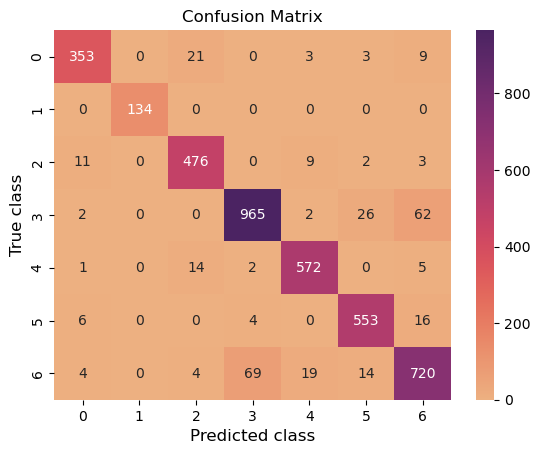

In [20]:
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted class", fontsize=12)
plt.ylabel("True class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)

plt.show

In [112]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dumy_Y = np_utils.to_categorical(encoded_Y)

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(x, dumy_Y, test_size = 0.3, stratify=dumy_Y, random_state=0)

In [114]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((9527, 16), (4084, 16), (9527, 7), (4084, 7))

In [115]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test= sc.transform(X_test)

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model

In [117]:
model = Sequential()
model.add(Dense(64,activation='relu', input_shape=(16,)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16,activation='relu'))
model.add(Dense(7,activation='softmax'))

In [118]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
             metrics=['accuracy'])


In [119]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                1088      
                                                                 
 dense_17 (Dense)            (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 16)                2064      
                                                                 
 dense_19 (Dense)            (None, 7)                 119       
                                                                 
Total params: 11,591
Trainable params: 11,591
Non-trainable params: 0
_________________________________________________________________


In [120]:
class_weights = {0:1, 1:910, 2:1519, 3:1618, 4:1916, 5:2224, 6:3024}

history = model.fit(X_train, Y_train, \
                   batch_size  = 7, epochs= 50, \
                   verbose = 2, class_weight = class_weights, \
                   validation_split = 0.2)

Epoch 1/50
1089/1089 - 3s - loss: 626.1343 - accuracy: 0.7941 - val_loss: 1.0995 - val_accuracy: 0.8295 - 3s/epoch - 3ms/step
Epoch 2/50
1089/1089 - 2s - loss: 415.8525 - accuracy: 0.8341 - val_loss: 0.9965 - val_accuracy: 0.8363 - 2s/epoch - 2ms/step
Epoch 3/50
1089/1089 - 2s - loss: 400.2598 - accuracy: 0.8376 - val_loss: 0.7895 - val_accuracy: 0.8274 - 2s/epoch - 2ms/step
Epoch 4/50
1089/1089 - 2s - loss: 381.2534 - accuracy: 0.8390 - val_loss: 0.7672 - val_accuracy: 0.8342 - 2s/epoch - 2ms/step
Epoch 5/50
1089/1089 - 2s - loss: 377.7294 - accuracy: 0.8360 - val_loss: 0.6667 - val_accuracy: 0.8416 - 2s/epoch - 2ms/step
Epoch 6/50
1089/1089 - 2s - loss: 367.4132 - accuracy: 0.8412 - val_loss: 0.7311 - val_accuracy: 0.8274 - 2s/epoch - 2ms/step
Epoch 7/50
1089/1089 - 2s - loss: 363.1861 - accuracy: 0.8404 - val_loss: 0.6628 - val_accuracy: 0.8421 - 2s/epoch - 2ms/step
Epoch 8/50
1089/1089 - 2s - loss: 362.2292 - accuracy: 0.8399 - val_loss: 0.6267 - val_accuracy: 0.8416 - 2s/epoch - 2

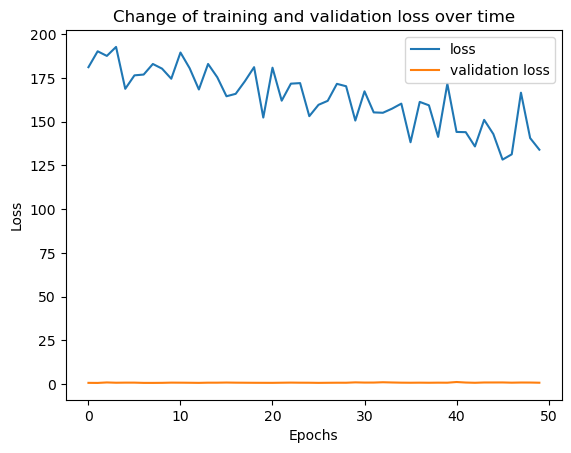

In [96]:
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Change of training and validation loss over time")
plt.show()


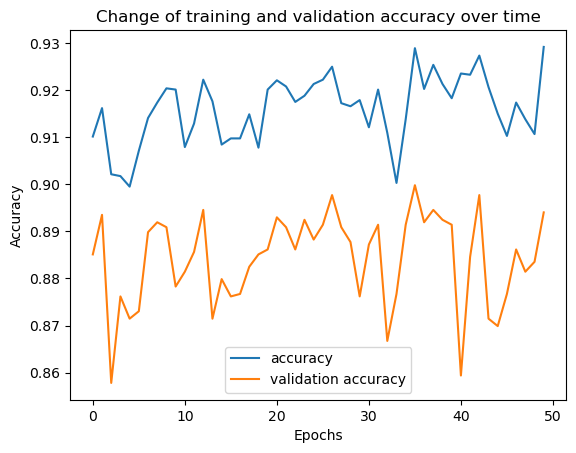

In [97]:
# Plot accuracy dynamics
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Change of training and validation accuracy over time")
plt.show()

In [98]:
model_performance = model.evaluate(X_test, Y_test)

128/128 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.8930


In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [109]:
y_test_arg=np.argmax(Y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

128/128 [==============================] - 0s 1ms/step
Confusion Matrix
[[242   5  88   0  19  20  23]
 [  0 157   0   0   0   0   0]
 [  0   1 470   0  13   0   5]
 [  0   0   0 949   2  14  99]
 [  0   0   6   1 554   0  17]
 [  0   0   1  20   0 562  25]
 [  0   0   3  48  15  12 713]]


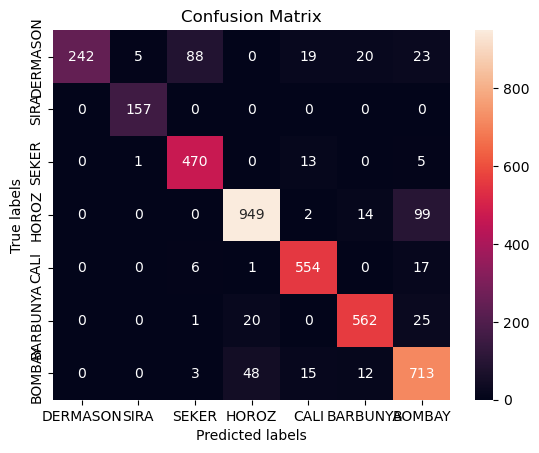

In [111]:
T7_lables =  ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']  

ax= plt.subplot()

cm = confusion_matrix(y_test_arg, Y_pred)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(T7_lables); ax.yaxis.set_ticklabels(T7_lables);



In [108]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76       397
           1       0.96      1.00      0.98       157
           2       0.83      0.96      0.89       489
           3       0.93      0.89      0.91      1064
           4       0.92      0.96      0.94       578
           5       0.92      0.92      0.92       608
           6       0.81      0.90      0.85       791

    accuracy                           0.89      4084
   macro avg       0.91      0.89      0.89      4084
weighted avg       0.90      0.89      0.89      4084

